In [1]:
#Install mlxtend library.
!pip install mlxtend


In [99]:
#Import necessary libraries, pandas, numpy and mlxtend
import pandas as pd
import numpy as np
import mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import fpgrowth



In [3]:
data_hosts_path = '/kaggle/input/olympic-games-medals-19862018/olympic_hosts.csv'
data_medals_path = '/kaggle/input/olympic-games-medals-19862018/olympic_medals.csv'
data_results_path = '/kaggle/input/olympic-games-medals-19862018/olympic_results.csv'
data_athletes_path = '/kaggle/input/olympic-games-medals-19862018/olympic_athletes.csv'

#### Host Data

In [4]:
df_hosts = pd.read_csv(data_hosts_path)
df_hosts.head()

,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
0,beijing-2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
1,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
2,pyeongchang-2018,2018-02-25T08:00:00Z,2018-02-08T23:00:00Z,Republic of Korea,PyeongChang 2018,Winter,2018
3,rio-2016,2016-08-21T21:00:00Z,2016-08-05T12:00:00Z,Brazil,Rio 2016,Summer,2016
4,sochi-2014,2014-02-23T16:00:00Z,2014-02-07T04:00:00Z,Russian Federation,Sochi 2014,Winter,2014


In [7]:
df_hosts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   game_slug        53 non-null     object
 1   game_end_date    53 non-null     object
 2   game_start_date  53 non-null     object
 3   game_location    53 non-null     object
 4   game_name        53 non-null     object
 5   game_season      53 non-null     object
 6   game_year        53 non-null     int64 
dtypes: int64(1), object(6)
memory usage: 3.0+ KB


#### Medals Data

In [8]:
df_medals = pd.read_csv(data_medals_path)
df_medals.head()

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/stefania-cons...,Stefania CONSTANTINI,Italy,IT,ITA
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/amos-mosaner,Amos MOSANER,Italy,IT,ITA
2,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/kristin-skaslien,Kristin SKASLIEN,Norway,NO,NOR
3,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/magnus-nedreg...,Magnus NEDREGOTTEN,Norway,NO,NOR
4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,https://olympics.com/en/athletes/almida-de-val,Almida DE VAL,Sweden,SE,SWE


In [10]:
df_medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21697 entries, 0 to 21696
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   discipline_title       21697 non-null  object
 1   slug_game              21697 non-null  object
 2   event_title            21697 non-null  object
 3   event_gender           21697 non-null  object
 4   medal_type             21697 non-null  object
 5   participant_type       21697 non-null  object
 6   participant_title      6584 non-null   object
 7   athlete_url            17027 non-null  object
 8   athlete_full_name      18073 non-null  object
 9   country_name           21697 non-null  object
 10  country_code           20195 non-null  object
 11  country_3_letter_code  21697 non-null  object
dtypes: object(12)
memory usage: 2.0+ MB


#### Results Data

In [12]:
df_results = pd.read_csv(data_results_path)
df_results.head()

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_url,athlete_full_name,value_unit,value_type
0,Curling,Mixed Doubles,beijing-2022,GameTeam,GOLD,"[('Stefania CONSTANTINI', 'https://olympics.co...",False,1,Italy,IT,ITA,NaN,NaN,NaN,NaN
1,Curling,Mixed Doubles,beijing-2022,GameTeam,SILVER,"[('Kristin SKASLIEN', 'https://olympics.com/en...",False,2,Norway,NO,NOR,NaN,NaN,NaN,NaN
2,Curling,Mixed Doubles,beijing-2022,GameTeam,BRONZE,"[('Almida DE VAL', 'https://olympics.com/en/at...",False,3,Sweden,SE,SWE,NaN,NaN,NaN,NaN
3,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Jennifer DODDS', 'https://olympics.com/en/a...",False,4,Great Britain,GB,GBR,NaN,NaN,NaN,NaN
4,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Rachel HOMAN', 'https://olympics.com/en/ath...",False,5,Canada,CA,CAN,NaN,NaN,NaN,NaN


In [13]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162804 entries, 0 to 162803
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   discipline_title       162804 non-null  object
 1   event_title            162804 non-null  object
 2   slug_game              162804 non-null  object
 3   participant_type       162804 non-null  object
 4   medal_type             20206 non-null   object
 5   athletes               7976 non-null    object
 6   rank_equal             32526 non-null   object
 7   rank_position          158926 non-null  object
 8   country_name           162804 non-null  object
 9   country_code           157768 non-null  object
 10  country_3_letter_code  162804 non-null  object
 11  athlete_url            129991 non-null  object
 12  athlete_full_name      141646 non-null  object
 13  value_unit             78646 non-null   object
 14  value_type             90049 non-null   object
dtype

#### Athletes Data

In [14]:
df_athletes = pd.read_csv(data_athletes_path)
df_athletes.head()

,athlete_url,athlete_full_name,games_participations,first_game,athlete_year_birth,athlete_medals,bio
0,https://olympics.com/en/athletes/cooper-woods-...,Cooper WOODS-TOPALOVIC,1,Beijing 2022,2000.0,NaN,NaN
1,https://olympics.com/en/athletes/elofsson,Felix ELOFSSON,2,PyeongChang 2018,1995.0,NaN,NaN
2,https://olympics.com/en/athletes/dylan-walczyk,Dylan WALCZYK,1,Beijing 2022,1993.0,NaN,NaN
3,https://olympics.com/en/athletes/olli-penttala,Olli PENTTALA,1,Beijing 2022,1995.0,NaN,NaN
4,https://olympics.com/en/athletes/reikherd,Dmitriy REIKHERD,1,Beijing 2022,1989.0,NaN,NaN


In [15]:
df_athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75904 entries, 0 to 75903
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   athlete_url           75904 non-null  object 
 1   athlete_full_name     75904 non-null  object 
 2   games_participations  75904 non-null  int64  
 3   first_game            75882 non-null  object 
 4   athlete_year_birth    73448 non-null  float64
 5   athlete_medals        15352 non-null  object 
 6   bio                   22842 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 4.1+ MB


### Joining Datasets

In [49]:
data = df_medals.merge(df_hosts, how='left', left_on='slug_game', right_on='game_slug')
data['athlete_full_name'] = data['athlete_full_name'].str.title()
# removes join columns
data.drop(['slug_game', 'game_slug'], inplace=True, axis=1)
# removes unused columns
data.drop(['game_end_date', 'game_start_date'], axis=1, inplace=True)
data.shape

(21697, 15)

In [50]:
data.head()


,discipline_title,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code,game_location,game_name,game_season,game_year
0,Curling,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/stefania-cons...,Stefania Constantini,Italy,IT,ITA,China,Beijing 2022,Winter,2022
1,Curling,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/amos-mosaner,Amos Mosaner,Italy,IT,ITA,China,Beijing 2022,Winter,2022
2,Curling,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/kristin-skaslien,Kristin Skaslien,Norway,NO,NOR,China,Beijing 2022,Winter,2022
3,Curling,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/magnus-nedreg...,Magnus Nedregotten,Norway,NO,NOR,China,Beijing 2022,Winter,2022
4,Curling,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,https://olympics.com/en/athletes/almida-de-val,Almida De Val,Sweden,SE,SWE,China,Beijing 2022,Winter,2022


## Pre-Processing Data

In [51]:
# replaces long country names with short analogs
country_dict = {
    'German Democratic Republic (Germany)':'Germany', 
    'Federal Republic of Germany':'Germany',
    "Democratic People's Republic of Korea":'North Korea',
    "Republic of Korea":"South Korea",
    "People's Republic of China":'China',
    "Islamic Republic of Iran":'Iran',
    "United States of America":'USA'}
data['country_name'] = data['country_name'].replace(country_dict)

In [52]:
# replaces changed disciplines names
discipline_map={
    "Gymnastics Artistic":"Artistic Gymnastics",
    "Gymnastics Rhythmic":"Rhythmic Gymnastics",
    "Synchronized Swimming":"Artistic Swimming",
    "Equestrian Dressage":"Equestrian",
    "Equestrian Jumping":"Equestrian",
    "Equestrian Eventing":"Equestrian",
    "Trampoline":"Trampoline Gymnastics",
    "Cycling BMX":"Cycling BMX Racing",
    "Short Track Speed Skating": "Short Track"
}
data['discipline_title'] = data['discipline_title'].replace(discipline_map)

In [53]:
data.isnull().sum()

discipline_title             0
event_title                  0
event_gender                 0
medal_type                   0
participant_type             0
participant_title        15113
athlete_url               4670
athlete_full_name         3624
country_name                 0
country_code              1502
country_3_letter_code        0
game_location                0
game_name                    0
game_season                  0
game_year                    0
dtype: int64

In [55]:
# Replace NaN values with 0
data = data.fillna(0, inplace=False)


In [56]:
data.isnull().sum()

discipline_title         0
event_title              0
event_gender             0
medal_type               0
participant_type         0
participant_title        0
athlete_url              0
athlete_full_name        0
country_name             0
country_code             0
country_3_letter_code    0
game_location            0
game_name                0
game_season              0
game_year                0
dtype: int64

In [57]:
data.dtypes

discipline_title         object
event_title              object
event_gender             object
medal_type               object
participant_type         object
participant_title        object
athlete_url              object
athlete_full_name        object
country_name             object
country_code             object
country_3_letter_code    object
game_location            object
game_name                object
game_season              object
game_year                 int64
dtype: object

In [58]:
data.head()

,discipline_title,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code,game_location,game_name,game_season,game_year
0,Curling,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/stefania-cons...,Stefania Constantini,Italy,IT,ITA,China,Beijing 2022,Winter,2022
1,Curling,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/amos-mosaner,Amos Mosaner,Italy,IT,ITA,China,Beijing 2022,Winter,2022
2,Curling,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/kristin-skaslien,Kristin Skaslien,Norway,NO,NOR,China,Beijing 2022,Winter,2022
3,Curling,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/magnus-nedreg...,Magnus Nedregotten,Norway,NO,NOR,China,Beijing 2022,Winter,2022
4,Curling,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,https://olympics.com/en/athletes/almida-de-val,Almida De Val,Sweden,SE,SWE,China,Beijing 2022,Winter,2022


In [114]:
# Filter data for relevant columns
data_groups = data[['medal_type', 'event_gender','country_name','discipline_title']]
filtered_data = pd.DataFrame(data_groups)

# Remove records if they contain 'unknown' values from 'target_type' and 'group_name'
filtered_data = filtered_data[~(filtered_data[['medal_type', 'event_gender', 'country_name','discipline_title']] == 'Unknown').any(axis=1)]
print('Values of unknown removed!')
filtered_data

Values of unknown removed!


,medal_type,event_gender,country_name,discipline_title
0,GOLD,Mixed,Italy,Curling
1,GOLD,Mixed,Italy,Curling
2,SILVER,Mixed,Norway,Curling
3,SILVER,Mixed,Norway,Curling
4,BRONZE,Mixed,Sweden,Curling
...,...,...,...,...
21692,SILVER,Men,Denmark,Weightlifting
21693,BRONZE,Men,Greece,Weightlifting
21694,GOLD,Men,Denmark,Weightlifting
21695,SILVER,Men,Great Britain,Weightlifting


## Apriori Method

### one-hot Encoding

In [115]:
items = set()
for col in filtered_data:
    items.update(filtered_data[col].unique())
#print(items)

itemset = set(items)
encoded_vals = []
for index, row in filtered_data.iterrows():
    rowset = set(row) 
    labels = {}
    uncommons = list(itemset - rowset)
    commons = list(itemset.intersection(rowset))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals[0]
ohe_df = pd.DataFrame(encoded_vals)
ohe_df

,Jamaica,Portugal,Botswana,3x3 Basketball,Ukraine,Philippines,Haiti,Sweden,Basketball,Modern Pentathlon,...,Croquet,Snowboard,Trinidad and Tobago,Ethiopia,Ice Hockey,Switzerland,Italy,GOLD,Curling,Mixed
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21692,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21693,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21694,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
21695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Apriori can now be applied after converting the values to boolean, and using a confidence value of 5%.


In [116]:
df = ohe_df.copy()
for col in df.columns:
    df[col] = df[col].astype(bool)

ohe_df = df.copy()

freq_items = apriori(ohe_df, min_support = 0.05, use_colnames = True, verbose = 1)
freq_items_sorted = freq_items.sort_values(by = 'support', ascending = False)
freq_items_sorted

Processing 36 combinations | Sampling itemset size 32


,support,itemsets
8,0.642116,(Men)
0,0.347006,(BRONZE)
10,0.327649,(GOLD)
2,0.325345,(SILVER)
9,0.291423,(Women)
11,0.224639,"(Men, BRONZE)"
19,0.209246,"(Men, GOLD)"
14,0.208232,"(Men, SILVER)"
4,0.142600,(USA)
3,0.141955,(Athletics)


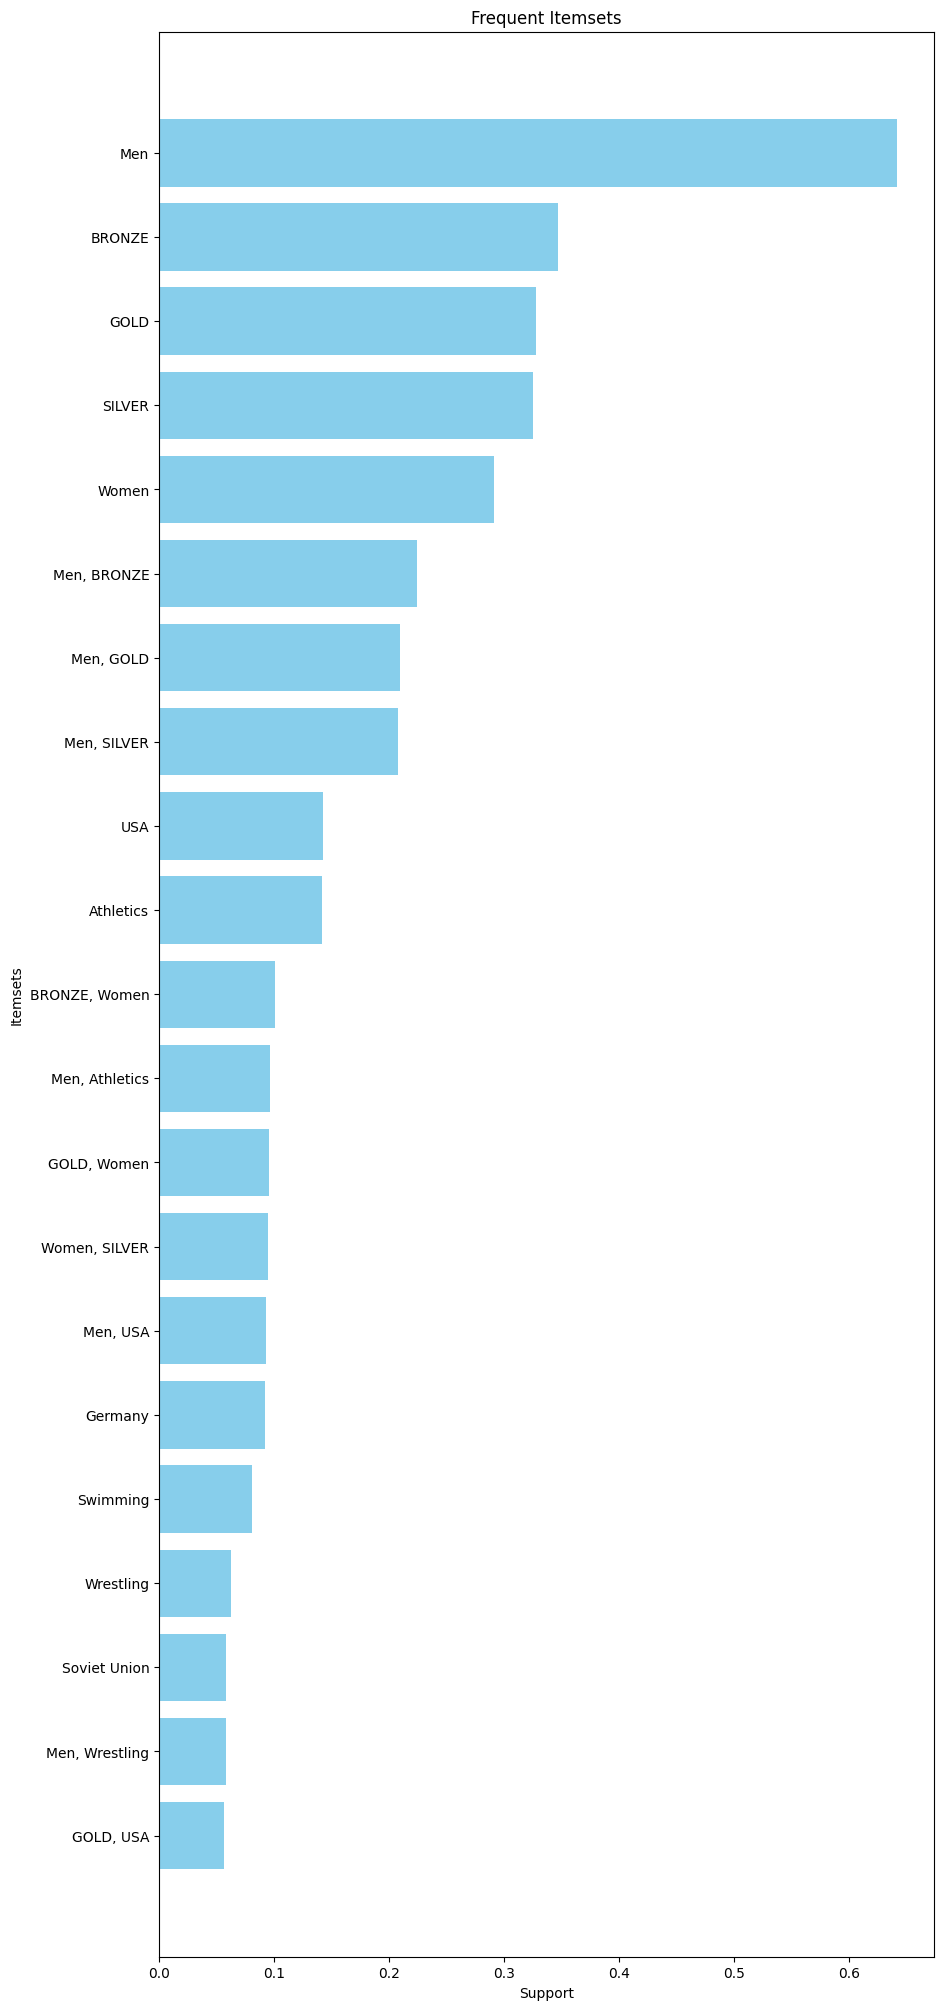

In [117]:
# Extract data for plotting
itemsets = freq_items_sorted['itemsets']
support = freq_items_sorted['support']

# Convert itemsets to strings for plotting
itemsets_str = [', '.join(itemset) for itemset in itemsets]

# Visualise the data
plt.figure(figsize=(10,25))
plt.barh(itemsets_str, support, color='skyblue')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.title('Frequent Itemsets')
plt.gca().invert_yaxis()  # Invert y-axis to show the most frequent itemsets at the top
plt.show()

##### It is noted that Men has the highest support as expected. As the unknown values for the columns have been removed, it is expected that the results may differ. This means that there is a large amount of data that cannot be used due to incomplete records and this will reduce the accuracy in the results.

## FP-Growth Method

##### An alternative method that produces the same results in this case, but utilises less resources is FP-Growth. While Apriori generates candidates of length k-1 and prunes those below minimum support, FP-Growth uses divide and conquer from a frequent pattern tree and is less resource intensive.

In [118]:
freq_items_fp = fpgrowth(ohe_df, min_support=0.05, use_colnames=True)
freq_items_fp_sorted = freq_items_fp.sort_values(by = 'support', ascending = False)
freq_items_fp_sorted

,support,itemsets
4,0.642116,(Men)
2,0.347006,(BRONZE)
0,0.327649,(GOLD)
1,0.325345,(SILVER)
3,0.291423,(Women)
13,0.224639,"(Men, BRONZE)"
11,0.209246,"(Men, GOLD)"
12,0.208232,"(Men, SILVER)"
5,0.142600,(USA)
8,0.141955,(Athletics)


##### Utilising the frequent items, it is now possible to investigate the association rules with a minimum confidence level 

In [119]:
#min threshold is 0.3

rules = association_rules(freq_items, metric="confidence", min_threshold=0.3)
rules_sorted = rules.sort_values(by = 'confidence', ascending = False)
rules_sorted

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,(Wrestling),(Men),0.062497,0.642116,0.058257,0.932153,1.451689,0.018126,5.274893,0.331889
7,(Athletics),(Men),0.141955,0.642116,0.096327,0.678571,1.056773,0.005175,1.113416,0.062611
8,(USA),(Men),0.142600,0.642116,0.093331,0.654493,1.019274,0.001765,1.035820,0.022055
1,(BRONZE),(Men),0.347006,0.642116,0.224639,0.647364,1.008172,0.001821,1.014880,0.012413
5,(SILVER),(Men),0.325345,0.642116,0.208232,0.640034,0.996757,-0.000678,0.994215,-0.004799
11,(GOLD),(Men),0.327649,0.642116,0.209246,0.638627,0.994566,-0.001143,0.990344,-0.008061
9,(USA),(GOLD),0.142600,0.327649,0.056321,0.394958,1.205430,0.009598,1.111247,0.198765
0,(Men),(BRONZE),0.642116,0.347006,0.224639,0.349842,1.008172,0.001821,1.004361,0.022648
2,(Women),(BRONZE),0.291423,0.347006,0.100659,0.345406,0.995387,-0.000467,0.997554,-0.006498
12,(Women),(GOLD),0.291423,0.327649,0.095589,0.328009,1.001098,0.000105,1.000536,0.001548


##### Here we see the prevalence of Men again. From the data it is possible to see the confidence levels that the consequents will have if the antecedents occur. Examples of this are that the game Wrestling has a 93.21% chance that Men will win/participate.


##### Now we can examine the data whilst keeping the unknown groups and compare the data.



In [121]:
# Filter data for relevant columns
data_groups_unknown = data[['medal_type', 'event_gender','country_name','discipline_title']]
filtered_data = pd.DataFrame(data_groups_unknown)

items = set()
for col in filtered_data:
    items.update(filtered_data[col].unique())
#print(items)

itemset = set(items)
encoded_vals = []
for index, row in filtered_data.iterrows():
    rowset = set(row) 
    labels = {}
    uncommons = list(itemset - rowset)
    commons = list(itemset.intersection(rowset))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals[0]
ohe_df = pd.DataFrame(encoded_vals)

In [122]:
df = ohe_df.copy()
for col in df.columns:
    df[col] = df[col].astype(bool)

ohe_df = df.copy()

freq_items = apriori(ohe_df, min_support = 0.05, use_colnames = True, verbose = 1)
freq_items_sorted = freq_items.sort_values(by = 'support', ascending = False)
freq_items_sorted

Processing 36 combinations | Sampling itemset size 32


,support,itemsets
8,0.642116,(Men)
0,0.347006,(BRONZE)
10,0.327649,(GOLD)
2,0.325345,(SILVER)
9,0.291423,(Women)
11,0.224639,"(Men, BRONZE)"
19,0.209246,"(Men, GOLD)"
14,0.208232,"(Men, SILVER)"
4,0.142600,(USA)
3,0.141955,(Athletics)


##### We can see that there is no such significant change by adding unknown groups.

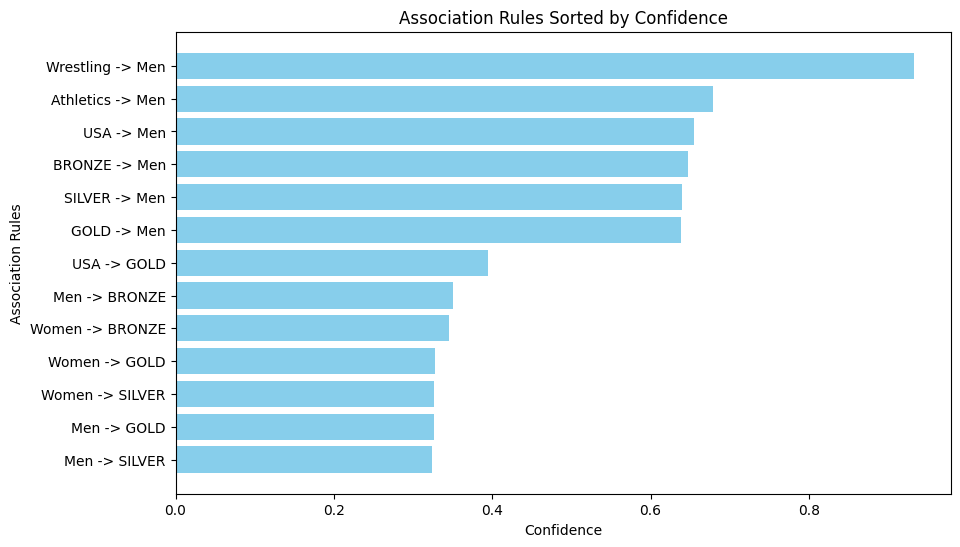

In [123]:
# Extract data for plotting
rule_antecedents = rules_sorted['antecedents'].apply(lambda x: next(iter(x)))
rule_consequents = rules_sorted['consequents'].apply(lambda x: next(iter(x)))
confidence_values = rules_sorted['confidence']

# Create labels for the plot
labels = [f"{antecedent} -> {consequent}" for antecedent, consequent in zip(rule_antecedents, rule_consequents)]

# Create a bar plot for confidence values
plt.figure(figsize=(10, 6))
plt.barh(labels, confidence_values, color='skyblue')
plt.xlabel('Confidence')
plt.ylabel('Association Rules')
plt.title('Association Rules Sorted by Confidence')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest confidence values at the top
plt.show()

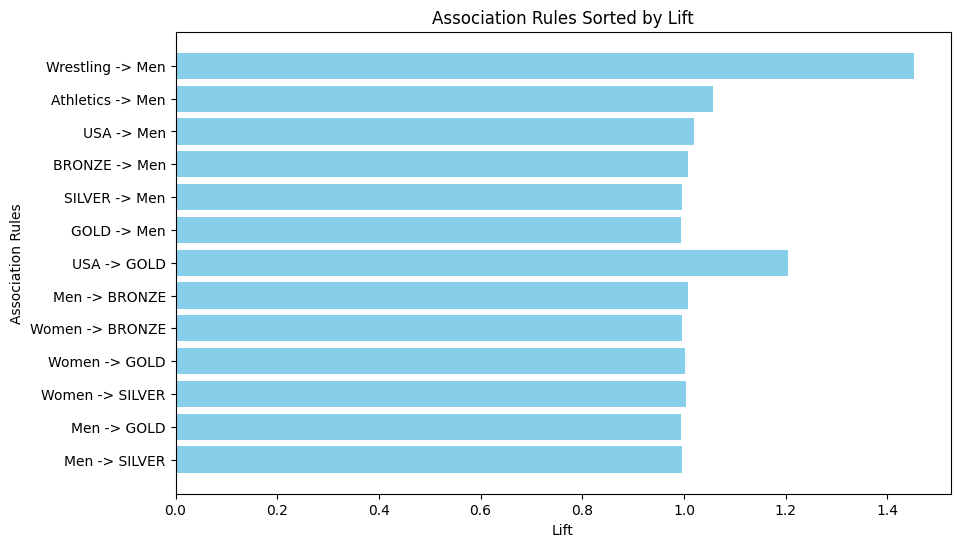

In [124]:
# Extract data for plotting
rule_antecedents = rules_sorted['antecedents'].apply(lambda x: next(iter(x)))
rule_consequents = rules_sorted['consequents'].apply(lambda x: next(iter(x)))
lift_values = rules_sorted['lift']

# Create labels for the plot
labels = [f"{antecedent} -> {consequent}" for antecedent, consequent in zip(rule_antecedents, rule_consequents)]

# Create a bar plot for lift values
plt.figure(figsize=(10, 6))
plt.barh(labels, lift_values, color='skyblue')
plt.xlabel('Lift')
plt.ylabel('Association Rules')
plt.title('Association Rules Sorted by Lift')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest lift values at the top
plt.show()

##### It can also be seen that by examining the lift & confidence values, there's no change in the occurance.

